In [1]:
! pip install scikit-plot

In [2]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [71]:
!pip install lightgbm

In [74]:
import pandas as pd
import numpy as np
from time import time
import scikitplot as skplt
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import requests
from pandas_profiling import ProfileReport
from sklearn.feature_selection import SelectKBest, SelectFromModel, chi2, mutual_info_classif
from sklearn.model_selection import train_test_split,cross_val_predict, RandomizedSearchCV
from sklearn.metrics import accuracy_score,recall_score, confusion_matrix, classification_report, roc_curve, auc, plot_roc_curve, f1_score, roc_auc_score, balanced_accuracy_score,precision_score
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression,Perceptron,SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import scikitplot as skplt
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import lightgbm as lgb
import shap
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [5]:
#upload the daya here    ## anevase ta data sou trexontas auto kai meta tha ta dianasei kanonika apo ton kodika
#from google.colab import files
#uploaded = files.upload()

In [6]:
train=pd.read_csv('train_data.csv')
train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [7]:
test=pd.read_csv('test_data.csv')
test.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0


In [8]:
dictionary = pd.read_csv('train_data_dictionary.csv')
dictionary

,Column,Description
0,case_id,Case_ID registered in Hospital
1,Hospital_code,Unique code for the Hospital
2,Hospital_type_code,Unique code for the type of Hospital
3,City_Code_Hospital,City Code of the Hospital
4,Hospital_region_code,Region Code of the Hospital
5,Available Extra Rooms in Hospital,Number of Extra rooms available in the Hospital
6,Department,Department overlooking the case
7,Ward_Type,Code for the Ward type
8,Ward_Facility_Code,Code for the Ward Facility
9,Bed Grade,Condition of Bed in the Ward


In [9]:
sample = pd.read_csv('sample_sub.csv')
sample.head()

,case_id,Stay
0,318439,0-10
1,318440,0-10
2,318441,0-10
3,318442,0-10
4,318443,0-10


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [11]:
train.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276847,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


In [12]:
train.isna().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [13]:
'''
ΜΙΑ ΠΕΡΙΠΤΩΣΗ ΕΙΝΑΙ ΝΑ ΓΕΜΙΣΟΥΜΕ ΤΑ NAn ΜΕ MODE,MEAN KAI ΛΟΙΠΑ 

train['Bed Grade'].fillna(statistics.mode(train['Bed Grade']),inplace=True)
train['City_Code_Patient'].fillna(statistics.mode(train['City_Code_Patient']),inplace=True)

ΜΙΑ ΠΕΡΙΠΤΩΣΗ ΕΙΝΑΙ ΝΑ ΝΤΡΟΠΑΡΟΥΜΕ ΄case_id', 'patientid'

train.drop(['case_id', 'patientid'], axis=1, inplace=True)
'''

"\nΜΙΑ ΠΕΡΙΠΤΩΣΗ ΕΙΝΑΙ ΝΑ ΓΕΜΙΣΟΥΜΕ ΤΑ NAn ΜΕ MODE,MEAN KAI ΛΟΙΠΑ \n\ntrain['Bed Grade'].fillna(statistics.mode(train['Bed Grade']),inplace=True)\ntrain['City_Code_Patient'].fillna(statistics.mode(train['City_Code_Patient']),inplace=True)\n\nΜΙΑ ΠΕΡΙΠΤΩΣΗ ΕΙΝΑΙ ΝΑ ΝΤΡΟΠΑΡΟΥΜΕ ΄case_id', 'patientid'\n\ntrain.drop(['case_id', 'patientid'], axis=1, inplace=True)\n"

**ΑΠΟΦΑΣΙΖΟΥΜΕ ΝΑ ΑΝΤΙΚΑΤΑΣΤΗΣΟΥΜΕ ΤΙΣ ΝΑΝ ΤΙΜΕΣ ΜΕ MODE ΣΤΙΣ ΣΤΗΛΕΣ  'BED GRADE' & 'CITY CODE PATIENT'**

In [14]:
train['Bed Grade'].fillna(statistics.mode(train['Bed Grade']),inplace=True)
train['City_Code_Patient'].fillna(statistics.mode(train['City_Code_Patient']),inplace=True)

In [15]:
train.isna().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

In [16]:
train.head(5)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


**ΠΑΡΑΤΗΡΟΥΜΕ ΟΤΙ ΟΙ ΠΕΡΙΣΣΟΤΕΡΕΣ ΕΙΣΑΓΩΓΕΣ ΓΙΝΟΝΤΑΙ ΣΤΙΣ ΗΛΙΚΙΕΣ 21-30 ΚΑΙ ΑΚΟΛΟΥΘΟΥΝ 11-20**

21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64


<AxesSubplot:>

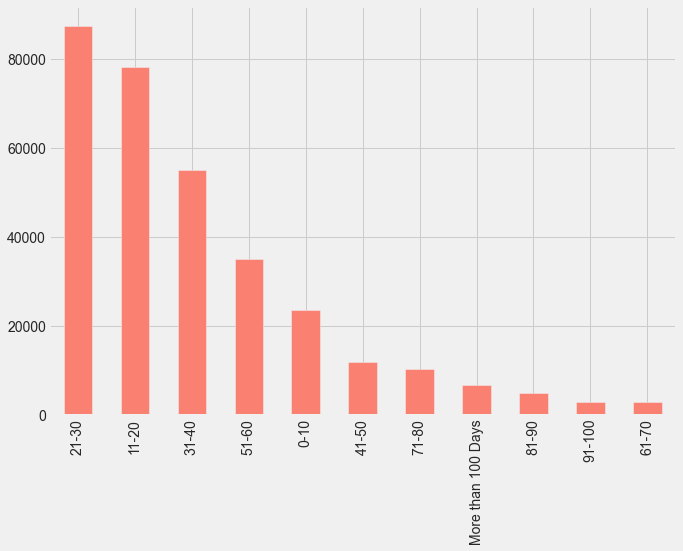

In [17]:
# Distribution of target feature
print(train.Stay.value_counts())
plt.figure(figsize=(10,7))
train.Stay.value_counts().plot(kind="bar", color = ['Salmon'])

In [18]:
# Check for unique values in every column
for features in train.columns:
    print('Unique Values for {}'.format(features))
    print(train[features].unique())
    print('======================================')
    print()

Unique Values for case_id
[     1      2      3 ... 318436 318437 318438]

Unique Values for Hospital_code
[ 8  2 10 26 23 32  1 22 16  9  6 29 12  3 21 28 27 19  5 14 13 31 24 17
 25 15 11 30 18  4  7 20]

Unique Values for Hospital_type_code
['c' 'e' 'b' 'a' 'f' 'd' 'g']

Unique Values for City_Code_Hospital
[ 3  5  1  2  6  9 10  4 11  7 13]

Unique Values for Hospital_region_code
['Z' 'X' 'Y']

Unique Values for Available Extra Rooms in Hospital
[ 3  2  1  4  6  5  7  8  9 10 12  0 11 20 14 21 13 24]

Unique Values for Department
['radiotherapy' 'anesthesia' 'gynecology' 'TB & Chest disease' 'surgery']

Unique Values for Ward_Type
['R' 'S' 'Q' 'P' 'T' 'U']

Unique Values for Ward_Facility_Code
['F' 'E' 'D' 'B' 'A' 'C']

Unique Values for Bed Grade
[2. 3. 4. 1.]

Unique Values for patientid
[ 31397  63418   8088 ... 125235  91081  21641]

Unique Values for City_Code_Patient
[ 7.  8.  2.  5.  6.  3.  4.  1.  9. 14. 25. 15. 12. 10. 28. 24. 23. 20.
 11. 13. 21. 18. 16. 26. 27. 22. 19. 

## **Data Processing & Feature engineering**


##**ΑΠΟΦΑΣΙΖΟΥΜΕ ΝΑ ΝΤΡΟΠΑΡΟΥΜΕ ΤΙΣ ΠΑΡΑΚΑΤΩ ΣΤΗΛΕΣ ΚΑΙ ΑΠΟ ΤΟ ΤΡΑΙΝ ΚΑΙ ΤΕΣΤ DATASET**

In [19]:
train = train.drop(['Hospital_region_code', 'Bed Grade', 'patientid', 'City_Code_Patient'], axis = 1)
test = test.drop(['Hospital_region_code', 'Bed Grade', 'patientid', 'City_Code_Patient'], axis = 1)

In [20]:
# Combine test and train dataset for processing
combined = [train, test]

###**ΕΦΑΡΜΟΖΟΥΜΕ LABEL ENCODER  ΣΕ TRAIN KAI TEST DATASET**

In [21]:
from sklearn.preprocessing import LabelEncoder

for dataset in combined:
    label = LabelEncoder()
    dataset['Department'] = label.fit_transform(dataset['Department'])
    dataset['Hospital_type_code'] = label.fit_transform(dataset['Hospital_type_code'])
    dataset['Ward_Facility_Code'] = label.fit_transform(dataset['Ward_Facility_Code'])
    dataset['Ward_Type'] = label.fit_transform(dataset['Ward_Type'])
    dataset['Type of Admission'] = label.fit_transform(dataset['Type of Admission'])
    dataset['Severity of Illness'] = label.fit_transform(dataset['Severity of Illness'])

<AxesSubplot:>

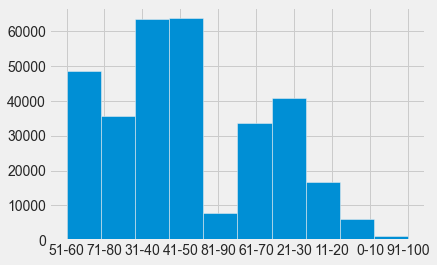

In [22]:
# Check age distribution
combined[0].Age.hist()

In [23]:
combined[0].Age.unique()

array(['51-60', '71-80', '31-40', '41-50', '81-90', '61-70', '21-30',
       '11-20', '0-10', '91-100'], dtype=object)

In [24]:
age_dict = {'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 9}

In [25]:
for dataset in combined:
    dataset['Age'] = dataset['Age'].replace(age_dict.keys(), age_dict.values())

In [26]:
combined[0].Stay.unique()

array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)

**ΘΑ ΧΩΡΙΣΟΥΜΕ ΤΟ ΕΥΡΟΣ ΤΗΣ ΠΑΡΑΜΟΝΗΣ (ΤΟ TARGET ΜΑΣ) ΣΕ 3 ΚΛΙΜΑΚΕΣ '0-10' - 
'11-20' - '21-ΑΝΩ'**


In [27]:
#stay_dict = {'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 2, '41-50': 2, '51-60': 2, '61-70': 2, '71-80': 2, '81-90': 2, '91-100': 2, 'More than 100 Days': 2}

In [28]:
stay_dict = {'0-10': 0, '11-20': 0, '21-30': 1, '31-40': 1, '41-50': 1, '51-60': 1, '61-70': 1, '71-80': 1, '81-90': 1, '91-100': 1, 'More than 100 Days': 1}

In [29]:
combined[0]['Stay'] = combined[0]['Stay'].replace(stay_dict.keys(), stay_dict.values())

<AxesSubplot:xlabel='Stay', ylabel='count'>

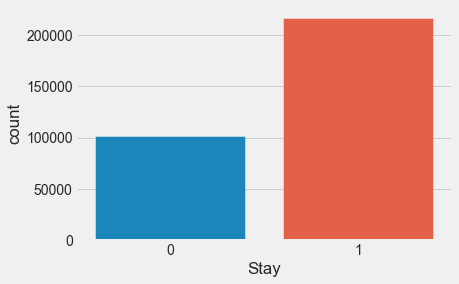

In [30]:
sns.countplot(x=combined[0]['Stay'], data=train)

<AxesSubplot:>

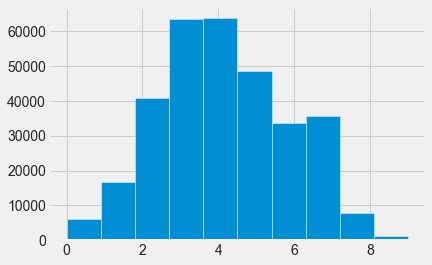

In [31]:
combined[0].Age.hist()

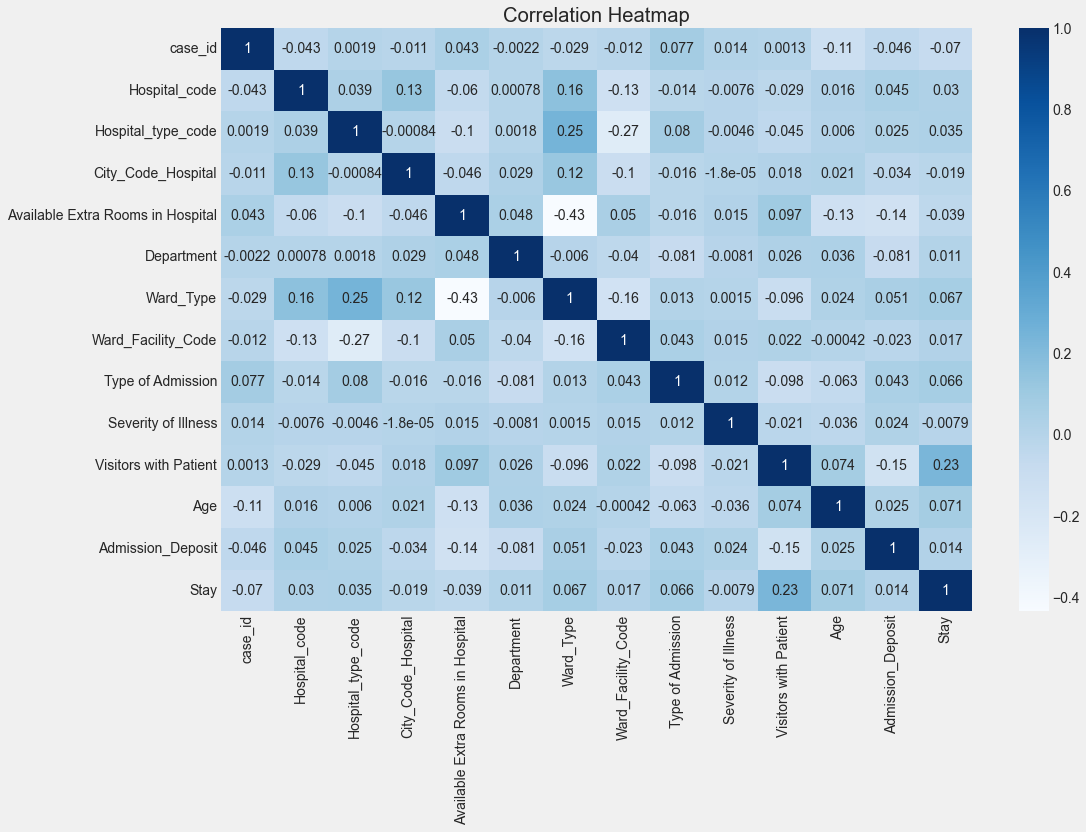

In [32]:
f, ax = plt.subplots(figsize=(15, 10))
plt.title("Correlation Heatmap")
ax=sns.heatmap(train.corr(), annot=True, fmt='.2g',cmap="Blues")

In [33]:
for dataset in combined:
    print(dataset.shape)

(318438, 14)
(137057, 13)


In [34]:
train.info()  # αφορά το train dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 14 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  int32  
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Available Extra Rooms in Hospital  318438 non-null  int64  
 5   Department                         318438 non-null  int32  
 6   Ward_Type                          318438 non-null  int32  
 7   Ward_Facility_Code                 318438 non-null  int32  
 8   Type of Admission                  318438 non-null  int32  
 9   Severity of Illness                318438 non-null  int32  
 10  Visitors with Patient              318438 non-null  int64  
 11  Age                                3184

In [35]:
test.info()   # αφορά  το test dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137057 entries, 0 to 137056
Data columns (total 13 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            137057 non-null  int64  
 1   Hospital_code                      137057 non-null  int64  
 2   Hospital_type_code                 137057 non-null  int32  
 3   City_Code_Hospital                 137057 non-null  int64  
 4   Available Extra Rooms in Hospital  137057 non-null  int64  
 5   Department                         137057 non-null  int32  
 6   Ward_Type                          137057 non-null  int32  
 7   Ward_Facility_Code                 137057 non-null  int32  
 8   Type of Admission                  137057 non-null  int32  
 9   Severity of Illness                137057 non-null  int32  
 10  Visitors with Patient              137057 non-null  int64  
 11  Age                                1370

Scaling Numerical Columns

In [36]:
train['Stay'] # y train

0         0
1         1
2         1
3         1
4         1
         ..
318433    0
318434    1
318435    0
318436    0
318437    0
Name: Stay, Length: 318438, dtype: int64

In [37]:
train

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,2,3,3,3,2,5,0,0,2,5,4911.0,0
1,2,2,2,5,2,3,3,5,1,0,2,5,5954.0,1
2,3,10,4,1,2,1,3,4,1,0,2,5,4745.0,1
3,4,26,1,2,2,3,2,3,1,0,2,5,7272.0,1
4,5,26,1,2,2,3,3,3,1,0,2,5,5558.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,0,6,3,3,1,5,0,2,3,4,4144.0,0
318434,318435,24,0,1,2,1,1,4,2,2,4,8,6699.0,1
318435,318436,7,0,4,3,2,2,5,0,1,3,7,4235.0,0
318436,318437,11,1,2,3,1,1,3,1,1,5,1,3761.0,0


##**CLASSIFIERS**

In [38]:
'''
y= train['Stay']
X= train.drop(['case_id','Stay'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

lr = LogisticRegression(multi_class='multinomial',class_weight='balanced',max_iter=300)
lr_or = lr.fit(X_train, y_train)
print('Logistic Regression score for training original set: %f' %lr.score(X_train, y_train))
y_pred=lr.predict(X_test)
y_true, y_pred = y_test, lr.predict(X_test)
print(classification_report(y_true, y_pred))
balanced_accuracy_score(y_true, y_pred)
'''

"\ny= train['Stay']\nX= train.drop(['case_id','Stay'], axis=1)\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)\n\nlr = LogisticRegression(multi_class='multinomial',class_weight='balanced',max_iter=300)\nlr_or = lr.fit(X_train, y_train)\nprint('Logistic Regression score for training original set: %f' %lr.score(X_train, y_train))\ny_pred=lr.predict(X_test)\ny_true, y_pred = y_test, lr.predict(X_test)\nprint(classification_report(y_true, y_pred))\nbalanced_accuracy_score(y_true, y_pred)\n"

In [39]:
'''
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

sns.barplot(x= ['KNN','DT','RF'],y= [acc_knn, acc_decision_tree,acc_random_forest])
'''



"\n# KNN\nknn = KNeighborsClassifier(n_neighbors = 3)\nknn.fit(X_train, y_train)\nY_pred = knn.predict(X_test)\nacc_knn = round(knn.score(X_train, y_train) * 100, 2)\nacc_knn\n\n# Decision Tree\ndecision_tree = DecisionTreeClassifier()\ndecision_tree.fit(X_train, y_train)\nY_pred = decision_tree.predict(X_test)\nacc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)\nacc_decision_tree\n\n# Random Forest\nrandom_forest = RandomForestClassifier(n_estimators=100)\nrandom_forest.fit(X_train, y_train)\nY_pred = random_forest.predict(X_test)\nrandom_forest.score(X_train, y_train)\nacc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)\nacc_random_forest\n\nsns.barplot(x= ['KNN','DT','RF'],y= [acc_knn, acc_decision_tree,acc_random_forest])\n"

In [40]:
'''
y= train['Stay']
X= train.drop(['case_id','Stay'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

classifier = RandomForestClassifier(class_weight='balanced')
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

importance = pd.Series(classifier.feature_importances_, index=list(X))
importance = importance/importance.max()
importance = importance.sort_values(ascending=False).head(20)
importance.sort_values().plot.barh(figsize=(14,10))
plt.show()
'''

"\ny= train['Stay']\nX= train.drop(['case_id','Stay'], axis=1)\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)\n\nclassifier = RandomForestClassifier(class_weight='balanced')\nclassifier.fit(X_train, y_train)\npredictions = classifier.predict(X_test)\n\nimportance = pd.Series(classifier.feature_importances_, index=list(X))\nimportance = importance/importance.max()\nimportance = importance.sort_values(ascending=False).head(20)\nimportance.sort_values().plot.barh(figsize=(14,10))\nplt.show()\n"

In [41]:
'''
shap_values = shap.TreeExplainer(classifier).shap_values(X_train, approximate=True)
shap.summary_plot(shap_values, X_train, plot_type="bar")
'''

'\nshap_values = shap.TreeExplainer(classifier).shap_values(X_train, approximate=True)\nshap.summary_plot(shap_values, X_train, plot_type="bar")\n'

In [42]:
'''
y= train['Stay']
X= train.drop(['case_id','Stay'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

estimators = [LogisticRegression(), RandomForestClassifier(verbose=True), DecisionTreeClassifier(),  KNeighborsClassifier(), CatBoostClassifier(), XGBClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(),xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),lgb.LGBMClassifier()]

metrics = {}
for estimator in estimators:
    tic = time()
    estimator.fit(X_train, y_train)
    predictions = estimator.predict(X_test)
    toc = time()
    metrics[str(estimator).split('(')[0]] = {
        'balanced accuracy':round(balanced_accuracy_score(y_test, predictions),2),
        'macro f1':round(f1_score(y_test, predictions, average='macro'),2),
        'fit time':round(toc - tic,2)
        }

'''

"\ny= train['Stay']\nX= train.drop(['case_id','Stay'], axis=1)\nX_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)\n\nestimators = [LogisticRegression(), RandomForestClassifier(verbose=True), DecisionTreeClassifier(),  KNeighborsClassifier(), CatBoostClassifier(), XGBClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(),xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),lgb.LGBMClassifier()]\n\nmetrics = {}\nfor estimator in estimators:\n    tic = time()\n    estimator.fit(X_train, y_train)\n    predictions = estimator.predict(X_test)\n    toc = time()\n    metrics[str(estimator).split('(')[0]] = {\n        'balanced accuracy':round(balanced_accuracy_score(y_test, predictions),2),\n        'macro f1':round(f1_score(y_test, predictions, average='macro'),2),\n        'fit time':round(toc - tic,2)\n        }\n\n"

In [43]:
'''
metrics = pd.DataFrame(metrics)
metrics
'''

'\nmetrics = pd.DataFrame(metrics)\nmetrics\n'

In [44]:
#metrics = metrics.T

In [45]:
#metrics

In [46]:
'''
value= [LogisticRegression(), RandomForestClassifier(), DecisionTreeClassifier(),  KNeighborsClassifier(), CatBoostClassifier(), XGBClassifier()]

key= ['LogisticRegression', 'RandomForsetClassifier', 'DecisionTreeClassifier',  'KNeighborsClassifier', 'CatBoostClassifier', 'XGBClassifier']

models= dict(zip(key,value))
accuracy_scores=[]
for key,value in models.items():
    value.fit(X_train,y_train)
    y_pred= value.predict(X_test)
    accuracy= accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(key)
    print(accuracy)
'''

"\nvalue= [LogisticRegression(), RandomForestClassifier(), DecisionTreeClassifier(),  KNeighborsClassifier(), CatBoostClassifier(), XGBClassifier()]\n\nkey= ['LogisticRegression', 'RandomForsetClassifier', 'DecisionTreeClassifier',  'KNeighborsClassifier', 'CatBoostClassifier', 'XGBClassifier']\n\nmodels= dict(zip(key,value))\naccuracy_scores=[]\nfor key,value in models.items():\n    value.fit(X_train,y_train)\n    y_pred= value.predict(X_test)\n    accuracy= accuracy_score(y_test, y_pred)\n    accuracy_scores.append(accuracy)\n    print(key)\n    print(accuracy)\n"

In [47]:
'''
ss= StandardScaler()

train= ss.fit_transform(train)
train = pd.DataFrame(train,columns=['case_id','Hospital_code','Hospital_type_code','City_Code_Hospital',
                 'Available Extra Rooms in Hospital', 'Department' ,'Ward_Type','Ward_Facility_Code','Type of Admission','Severity of Illness','Visitors with Patient','Age','Admission_Deposit','Stay'])
train
'''

"\nss= StandardScaler()\n\ntrain= ss.fit_transform(train)\ntrain = pd.DataFrame(train,columns=['case_id','Hospital_code','Hospital_type_code','City_Code_Hospital',\n                 'Available Extra Rooms in Hospital', 'Department' ,'Ward_Type','Ward_Facility_Code','Type of Admission','Severity of Illness','Visitors with Patient','Age','Admission_Deposit','Stay'])\ntrain\n"

In [48]:
N_train=train.sample(n=2000)

In [97]:
Models = pd.DataFrame(columns=['Algorithm','Model Score','Precision','Recall','F1 score','ROC-AUC score'])

def taining_without_feature_selection(Parameters, Model, Dataframe, Modelname):
    
    train = Dataframe.copy()
    
    X = train.drop(['case_id','Stay'], axis=1)
    y = train['Stay']
    
    #Traditional split of the dataset 80% - 20%
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    x_train, x_test, y_train, y_test = x_train.values, x_test.values, y_train.values, y_test.values

    #Proportional split of 80% data with respect to the class of the target feature ie. [1,0]
    sf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
    print(sf)
    print(sf.split(x_train, y_train))

    for train_index, test_index in sf.split(x_train, y_train):
#         print(train_index)
#         print(test_index)
        sf_x_train, sf_x_test = X.iloc[train_index], X.iloc[test_index]
        sf_y_train, sf_y_test = y.iloc[train_index], y.iloc[test_index]
        
    sf_x_train, sf_x_test, sf_y_train, sf_y_test = sf_x_train.values, sf_x_test.values, sf_y_train.values, sf_y_test.values
    
    model_parameter_sm = Parameters

    rand_model = RandomizedSearchCV(Model, model_parameter_sm, n_iter=4)
    print(rand_model)
     
    #Identifying the best parameters through RandomizedSearchCV()
    for train, test in sf.split(sf_x_train, sf_y_train):
        pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_model) 
        fitting_model = pipeline.fit(sf_x_train[train], sf_y_train[train])
        best_model = rand_model.best_estimator_
        print(best_model)

    #Evaluation with against 20% unseen testing data
    print()
    print("Evaluation Of Models")  

    sm = SMOTE(sampling_strategy='minority', random_state=42)
    Xsm_train, ysm_train = sm.fit_resample(sf_x_train, sf_y_train)
    print()
    print("Random Model Evaluation")  
    
    final_model_sm = rand_model.best_estimator_
    print(final_model_sm)
    final_model_sm.fit(Xsm_train, ysm_train)

    prediction = final_model_sm.predict(x_test)

    print(classification_report(y_test, prediction))
    
    model = {}

    model['Algorithm'] = Modelname
    model['Model Score'] = str(round((accuracy_score(y_test, prediction)*100),2)) + "%"
    model['Precision'] = round(precision_score(y_test, prediction),2)
    model['Recall'] = round(recall_score(y_test, prediction),2)
    model['F1 score'] = round(f1_score(y_test, prediction),2)
    model['ROC-AUC score'] = round(roc_auc_score(y_test, prediction),2)
    
    return model


In [50]:
'''
print("Logistic Regression")
TrainedModel = taining_without_feature_selection({"penalty": ['l2'], 'C': [0.001, 0.01]}, LogisticRegression(solver='liblinear'), train, "Logistic Regression")
Models = Models.append(TrainedModel,ignore_index=True)
'''

'\nprint("Logistic Regression")\nTrainedModel = taining_without_feature_selection({"penalty": [\'l2\'], \'C\': [0.001, 0.01]}, LogisticRegression(solver=\'liblinear\'), train, "Logistic Regression")\nModels = Models.append(TrainedModel,ignore_index=True)\n'

In [98]:
print("K Nearest Neighbour")
TrainedModel = taining_without_feature_selection({"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}, KNeighborsClassifier(), train,"K Nearest Neighbour")
Models = Models.append(TrainedModel,ignore_index=True)

K Nearest Neighbour
StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
<generator object _BaseKFold.split at 0x0000026056719040>
RandomizedSearchCV(estimator=KNeighborsClassifier(), n_iter=4,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': [2, 3, 4]})
KNeighborsClassifier(algorithm='brute', n_neighbors=3)
KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3)
KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3)
KNeighborsClassifier(algorithm='brute', n_neighbors=3)
KNeighborsClassifier(algorithm='kd_tree', n_neighbors=3)

Evaluation Of Models

Random Model Evaluation
KNeighborsClassifier(algorithm='kd_tree', n_neighbors=3)
              precision    recall  f1-score   support

           0       0.55      0.76      0.64     20250
           1       0.87      0.71      0.78     43438

    accuracy               

In [99]:
print("DecisionTree Classifier")
TrainedModel = taining_without_feature_selection({"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)),"min_samples_leaf": list(range(5,7,1))}, DecisionTreeClassifier(), train, "DecisionTree Classifier")
Models = Models.append(TrainedModel,ignore_index=True)


DecisionTree Classifier
StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
<generator object _BaseKFold.split at 0x0000026056719190>
RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=4,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3],
                                        'min_samples_leaf': [5, 6]})
DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)
DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=6)
DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=6)
DecisionTreeClassifier(max_depth=3, min_samples_leaf=6)
DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)

Evaluation Of Models

Random Model Evaluation
DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)
              precision    recall  f1-score   support

           0       0.49      0.33      0.39 

In [100]:
print("Random Forest Classifier")
TrainedModel = taining_without_feature_selection({"max_depth": [3, 5, 10, None],"n_estimators": [100, 200, 300, 400, 500]},  RandomForestClassifier(), train, "Random Forest Classifier")
Models = Models.append(TrainedModel,ignore_index=True)


Random Forest Classifier
StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
<generator object _BaseKFold.split at 0x0000026056719200>
RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=4,
                   param_distributions={'max_depth': [3, 5, 10, None],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]})
RandomForestClassifier(max_depth=5)
RandomForestClassifier(n_estimators=300)
RandomForestClassifier(max_depth=10, n_estimators=500)
RandomForestClassifier(max_depth=10)
RandomForestClassifier(max_depth=10, n_estimators=400)

Evaluation Of Models

Random Model Evaluation
RandomForestClassifier(max_depth=10, n_estimators=400)
              precision    recall  f1-score   support

           0       0.55      0.43      0.48     20250
           1       0.76      0.84      0.80     43438

    accuracy                           0.71     63688
   macro avg       0.65      0.63 

In [ ]:
print("GradientBoostingClassifier")
TrainedModel = taining_without_feature_selection({"learning_rate": [0.1,0.01,0.001,0.0001],"max_depth": [3, 5, 10, None],"n_estimators": [100, 200, 300, 400, 500]},  GradientBoostingClassifier(), train, "GradientBoostingClassifier")
Models = Models.append(TrainedModel,ignore_index=True)

GradientBoostingClassifier
StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
<generator object _BaseKFold.split at 0x0000026056719DD0>
RandomizedSearchCV(estimator=GradientBoostingClassifier(), n_iter=4,
                   param_distributions={'learning_rate': [0.1, 0.01, 0.001,
                                                          0.0001],
                                        'max_depth': [3, 5, 10, None],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]})
GradientBoostingClassifier(max_depth=5, n_estimators=200)


In [ ]:
print("Support Vector Classifier")
TrainedModel = taining_without_feature_selection({'C': [1,10,],'kernel': ['rbf','linear']},  SVC(),train , "Support Vector Classifier")
Models = Models.append(TrainedModel,ignore_index=True)

In [ ]:
print("AdaBoostClassifier")
TrainedModel = taining_without_feature_selection({"learning_rate": [0.1,0.01,0.001,0.0001],"n_estimators": [100, 200, 300, 400, 500]},  AdaBoostClassifier(), train, "AdaBoostClassifier")
Models = Models.append(TrainedModel,ignore_index=True)

In [ ]:
print("XGBClassifier")
TrainedModel = taining_without_feature_selection({'verbosity':[0,2]},XGBClassifier(), train, "XGBClassifier")
Models = Models.append(TrainedModel,ignore_index=True)

In [ ]:
print("GaussianNB")
TrainedModel = taining_without_feature_selection({},GaussianNB(), train, "GaussianNB")
Models = Models.append(TrainedModel,ignore_index=True)

In [86]:
#DecisionTreeClassifier().get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [ ]:
print("Logistic Regression")
TrainedModel = taining_without_feature_selection({"penalty": ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}, LogisticRegression(solver='liblinear'),  train, "Logistic Regression")
Models = Models.append(TrainedModel,ignore_index=True)

In [88]:
Models

,Algorithm,Model Score,Precision,Recall,F1 score,ROC-AUC score
0,K Nearest Neighbour,63.5%,0.82,0.63,0.71,0.64
1,DecisionTree Classifier,56.5%,0.86,0.46,0.60,0.64
2,Random Forest Classifier,84.0%,0.86,0.92,0.89,0.78
3,GradientBoostingClassifier,89.5%,0.92,0.94,0.93,0.87
4,Support Vector Classifier,38.75%,0.82,0.17,0.29,0.54
5,AdaBoostClassifier,77.0%,0.81,0.89,0.85,0.68
6,AdaBoostClassifier,71.0%,0.82,0.75,0.79,0.68
7,XGBClassifier,87.75%,0.91,0.92,0.91,0.85
8,GaussianNB,60.0%,0.82,0.56,0.66,0.63
9,GaussianNB,60.0%,0.82,0.56,0.66,0.63


In [96]:
Models.sort_values('F1 score',  ascending=False) 

,Algorithm,Model Score,Precision,Recall,F1 score,ROC-AUC score
3,GradientBoostingClassifier,89.5%,0.92,0.94,0.93,0.87
7,XGBClassifier,87.75%,0.91,0.92,0.91,0.85
2,Random Forest Classifier,84.0%,0.86,0.92,0.89,0.78
5,AdaBoostClassifier,77.0%,0.81,0.89,0.85,0.68
6,AdaBoostClassifier,71.0%,0.82,0.75,0.79,0.68
0,K Nearest Neighbour,63.5%,0.82,0.63,0.71,0.64
10,Logistic Regression,63.5%,0.83,0.61,0.70,0.65
8,GaussianNB,60.0%,0.82,0.56,0.66,0.63
9,GaussianNB,60.0%,0.82,0.56,0.66,0.63
1,DecisionTree Classifier,56.5%,0.86,0.46,0.60,0.64
